In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import SCORERS, accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, classification_report, multilabel_confusion_matrix, mean_squared_error, hamming_loss, zero_one_loss
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.impute import SimpleImputer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import PorterStemmer,SnowballStemmer
import re
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.exceptions import UndefinedMetricWarning
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import itertools
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from bayes_opt import BayesianOptimization

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fakeNews = pd.read_csv('fake.csv')
fakeNews.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [3]:
fakeNews.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [4]:
fakeNews = fakeNews.drop(['uuid','ord_in_thread','author','published','language','crawled','site_url','country','domain_rank',
                         'thread_title','spam_score','main_img_url','replies_count','participants_count','likes', 'comments',
                          'shares'], axis=1)

In [5]:
fakeNews.head()

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias


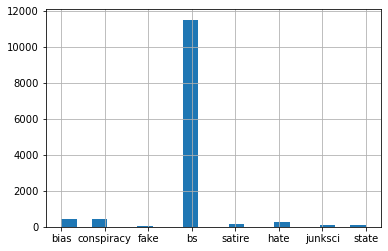

In [6]:
fakeNews.type.hist(bins=20)

In [7]:
fakeNews = fakeNews[fakeNews.type != 'bs']

In [8]:
fakeNews.shape

(1507, 3)

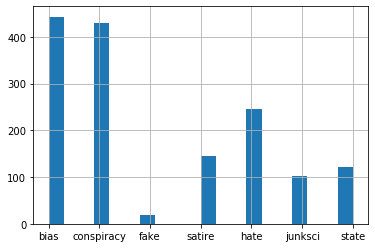

In [9]:
fakeNews.type.hist(bins=20)

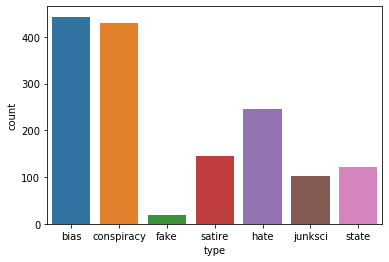

In [10]:
sns.countplot(fakeNews.type)

In [11]:
fakeNews

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...,...
12691,School named for Munich-massacre mastermind,School named for Munich-massacre mastermind Te...,bias
12692,Russia unveils 'Satan 2' missile,WARS AND RUMORS OF WARS Russia unveils 'Satan ...,bias
12693,Check out Hillary-themed 'haunted house',Check out Hillary-themed 'haunted house' Anti-...,bias
12694,Good Samaritan wearing Indian headdress disarm...,Good Samaritan wearing Indian headdress disarm...,bias


In [12]:
fakeNews.index = pd.RangeIndex(len(fakeNews.index))
fakeNews

,title,text,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,bias
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,bias
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,bias
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias
...,...,...,...
1502,School named for Munich-massacre mastermind,School named for Munich-massacre mastermind Te...,bias
1503,Russia unveils 'Satan 2' missile,WARS AND RUMORS OF WARS Russia unveils 'Satan ...,bias
1504,Check out Hillary-themed 'haunted house',Check out Hillary-themed 'haunted house' Anti-...,bias
1505,Good Samaritan wearing Indian headdress disarm...,Good Samaritan wearing Indian headdress disarm...,bias


In [13]:
fakeNews[fakeNews['text'].isnull()]

,title,text,type
729,"Sur Twitter, Donald Trump se félicite d’avoir ...",NaN,satire
730,Live Soirée présidentielle US 2016 >> Le Gorafi,NaN,satire
731,Elections US : les premières estimations donne...,NaN,satire
732,Les Américains ne sont plus qu’à quelques heur...,NaN,satire
733,Donald Trump en 5 dates >> Le Gorafi,NaN,satire
734,Donald Trump s’excuse pour toutes les minorité...,NaN,satire
735,Hillary Clinton en 5 dates >> Le Gorafi,NaN,satire
736,Des millions d’Américains recherchent massivem...,NaN,satire
737,Les gardes-frontières se mettent en alerte pou...,NaN,satire
738,La Russie a profité de l’élection américaine p...,NaN,satire


In [14]:
iRows = fakeNews[fakeNews['text'].isnull()]
iRowIndexes = iRows.index.values
for index in iRowIndexes:
    fakeNews.iloc[index]['text'] = fakeNews.iloc[index]['title']

In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fakeNews = pd.DataFrame(imp.fit_transform(fakeNews),columns=['title','text','type'])

In [27]:
y = fakeNews.type
X = fakeNews.drop('type', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(1054, 2) (1054,) (453, 2) (453,)


In [222]:
stemmer = SnowballStemmer("english")
words = stopwords.words("english")

Xtrain.loc[:, 'title'] = Xtrain['title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
Xtrain.loc[:, 'text'] = Xtrain['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
Xtest.loc[:, 'text'] = Xtest['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [223]:
Xtrain

,title,text
841,treat kidney infect with these home remedi,back pain pain side it import treat proper red...
1257,trump presid creat mountain of salt from butth...,rejoic gentlemen the tear liber flow freeli do...
828,compound found onion anti ovarian cancer effect,compound found onion anti ovarian cancer effec...
881,clinton isn let up as she hammer trump for pim...,hillari clinton keep foot gas pedal hammer don...
1242,donald trump rush off stage in reno after poss...,donald trump rush off stage in reno after poss...
...,...,...
763,horoscop du novembr le gorafi,horoscop du novembr le gorafi
835,dilbert creator scott adam endors trump say hi...,dilbert creator scott adam endors trump say hi...
1216,how popul growth industri agricultur and envir...,how popul growth industri agricultur and envir...
559,obama un ambassador cuba right about our human...,obama un ambassador cuba right about our human...


In [224]:
Xtest

,title,text
326,Life: Environmental Win! Poland Spring Is Figh...,email it come surpris billion bottl water indu...
933,"President Obama Gets Real, Not Revenge, On Rep...",by rmuse sat oct th pm he take conspiraci theo...
279,Is it possible that Saudi King be tried in US ...,email accord jasta law allow govern leader for...
1261,What Donald Trump’s Victory Means For Men,the celebr end come absorb fact donald trump n...
1435,Federal judge charges Sheriff Joe with contempt,feder judg charg sheriff joe contempt arpaio s...
...,...,...
426,11 Stupid Things Vox.com's Matthew Yglesias Ha...,stupid thing vox com matthew yglesia has said ...
1209,The Wisdom Books Of The Old Testament,the interest book bibl believ god wisdom book ...
548,The Battle at UNESCO,the muslim bloc may battl israel win war octob...
1303,"Wikileaks Gives Hillary An Ultimatum: QUIT, Or...",home leftist corrupt wikileak give hillari an ...


In [225]:
Xtrain = Xtrain['text']
Xtest = Xtest['text']

In [226]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(Xtrain.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(Xtest.values.astype('U'))

In [22]:
# sm = SMOTE(random_state=8)
# train_tfIdf, ytrain = sm.fit_sample(train_tfIdf, ytrain, )
# print ('Shape of oversampled data: {}'.format(train_tfIdf.shape))
# print ('Shape of Y: {}'.format(ytrain.shape))

In [23]:
#train_tfIdf = np.floor(train_tfIdf).astype(int)
#ytrain = np.array(ytrain)

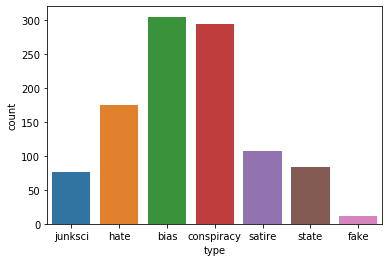

In [24]:
sns.countplot(ytrain)

Logistic Regression

In [88]:
Xtrain_lg = train_tfIdf
ytrain_lg = ytrain

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize = (16,12))
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fig.set_size_inches(10, 8, forward=True)
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax



In [90]:
lg_model = Pipeline([
        ('upsampling', SMOTE()),
        ('logistic_classification', LogisticRegression(solver = "newton-cg", max_iter = 10000, penalty='none'))
    ])

In [91]:
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
#     warnings.filterwarnings("ignore", category=FutureWarning)

#     logistic = LogisticRegression( solver = "newton-cg", max_iter = 10000, penalty='none')

#     interact_model = logistic.fit(Xtrain_lg, ytrain_lg)

#     scoring = {'acc': 'accuracy',
#            'rec': 'recall_macro',
#            'prec': 'precision_macro',
#            'f1score': 'f1_macro'}

#     scores = cross_validate(logistic, Xtrain_lg, ytrain_lg, scoring=scoring,
#                         cv=5, return_train_score=True)

#     print(f"accuracy: {scores['test_acc'].mean()}")
#     print(f"  recall: {scores['test_rec'].mean()}")
#     print(f"precision: {scores['test_prec'].mean()}")
#     print(f"f1_score: {scores['test_f1score'].mean()}")


In [92]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)

    interact_model = lg_model.fit(Xtrain_lg, ytrain_lg)

    scoring = {'acc': 'accuracy',
            'rec': 'recall_macro',
            'prec': 'precision_macro',
            'f1score': 'f1_macro'}

    scores = cross_validate(lg_model, Xtrain_lg, ytrain_lg, scoring=scoring,
                        cv=5, return_train_score=True)
     
    accuracy_lg = scores['test_acc'].mean()
    recall_lg = scores['test_rec'].mean()
    precision_lg = scores['test_prec'].mean()
    f1_score_lg = scores['test_f1score'].mean()
    print(f"accuracy: {accuracy_lg}")
    print(f"recall: {recall_lg}")
    print(f"precision: {precision_lg}")
    print(f"f1_score: {f1_score_lg}")
         

accuracy: 0.7552538540805181
recall: 0.6820715915252913
precision: 0.758770425114091
f1_score: 0.706447178121339


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       138
           1       0.80      0.75      0.77       135
           2       1.00      0.57      0.73         7
           3       0.77      0.72      0.74        71
           4       0.65      0.77      0.70        26
           5       0.81      0.77      0.79        39
           6       0.88      0.78      0.83        37

    accuracy                           0.79       453
   macro avg       0.81      0.75      0.77       453
weighted avg       0.79      0.79      0.79       453

[[[281  34]
  [ 17 121]]

 [[292  26]
  [ 34 101]]

 [[446   0]
  [  3   4]]

 [[367  15]
  [ 20  51]]

 [[416  11]
  [  6  20]]

 [[407   7]
  [  9  30]]

 [[412   4]
  [  8  29]]]
Normalized confusion matrix


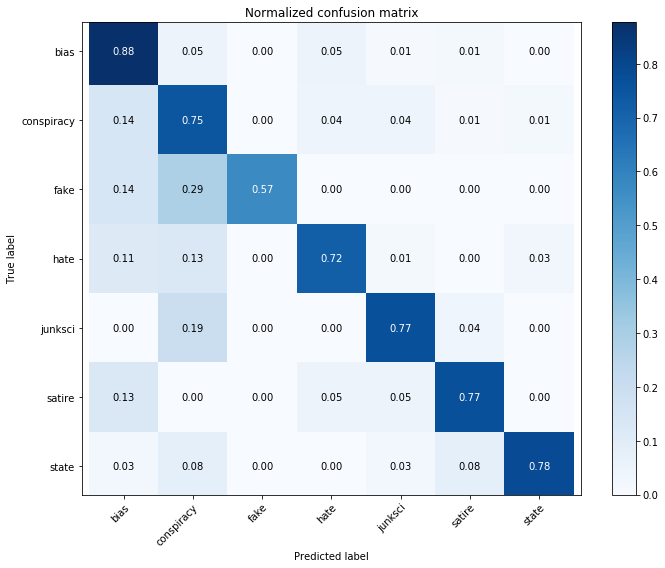

In [93]:
y_pred = interact_model.predict(test_tfIdf)
cnf_matrix = confusion_matrix(ytest,y_pred)
mltcnf_matrix = multilabel_confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, np.unique(y), normalize=True,
                      title='Normalized confusion matrix')

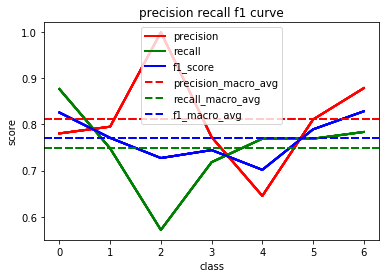

In [176]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, y_pred)[0]
    recall[i]= precision_recall_fscore_support(ytest, y_pred)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, y_pred)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

In [183]:
print("Hamming Loss: ",hamming_loss(ytest,y_pred))

Hamming Loss:  0.2141280353200883


In [204]:
TruePositive = np.diag(cnf_matrix)
pd.DataFrame(TruePositive)

,0
0,88
1,99
2,3
3,47
4,22
5,28
6,33


Naive Bayes

In [94]:
Xtrain_nb = train_tfIdf
ytrain_nb = ytrain

In [95]:
nb_model = Pipeline([
        ('upsampling', SMOTE()),
        ('nbc_classification', MultinomialNB())
    ])

In [96]:
#nb_classifier = MultinomialNB(alpha=100)

#nb_classifier.fit(train_tfIdf, ytrain)
#pred = nb_classifier.predict(test_tfIdf)
#nb_model.get_params().keys()

In [97]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    alpha = np.arange(0,1000,5)
    tuned_parameters = {'nbc_classification__alpha': alpha}
    scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']
    rs_nb = RandomizedSearchCV(estimator = nb_model, param_distributions = tuned_parameters, n_iter = 100,cv = 5, iid = True, scoring=scoring, refit='recall_macro')
    # Fit the random search model
    rs_nb.fit(Xtrain_nb, ytrain_nb)

E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [189]:
rs_nb.best_params_

{'nbc_classification__alpha': 320}

In [98]:
rs_nb_cvres = pd.DataFrame(rs_nb.cv_results_)
rs_nb_cvres.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_nbc_classification__alpha', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_recall_macro',
       'split1_test_recall_macro', 'split2_test_recall_macro',
       'split3_test_recall_macro', 'split4_test_recall_macro',
       'mean_test_recall_macro', 'std_test_recall_macro',
       'rank_test_recall_macro', 'split0_test_precision_macro',
       'split1_test_precision_macro', 'split2_test_precision_macro',
       'split3_test_precision_macro', 'split4_test_precision_macro',
       'mean_test_precision_macro', 'std_test_precision_macro',
       'rank_test_precision_macro', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro',
       'split4_test_f1_macro', 'mean_test_f1_mac

In [99]:
print('Accuracy: ',np.mean(rs_nb_cvres.mean_test_accuracy))
print('Precision: ',np.mean(rs_nb_cvres.mean_test_precision_macro))
print('Recall: ',np.mean(rs_nb_cvres.mean_test_recall_macro))
print('F1-Score: ',np.mean(rs_nb_cvres.mean_test_f1_macro))

Accuracy:  0.5372011385199241
Precision:  0.6033538109657655
Recall:  0.6337401482282699
F1-Score:  0.5173803706217964


              precision    recall  f1-score   support

           0       0.70      0.49      0.58       138
           1       0.88      0.21      0.35       135
           2       0.18      0.86      0.30         7
           3       0.38      0.83      0.52        71
           4       0.44      0.88      0.59        26
           5       0.84      0.41      0.55        39
           6       0.48      0.81      0.60        37

    accuracy                           0.51       453
   macro avg       0.56      0.64      0.50       453
weighted avg       0.67      0.51      0.50       453

[[[286  29]
  [ 70  68]]

 [[314   4]
  [106  29]]

 [[419  27]
  [  1   6]]

 [[285  97]
  [ 12  59]]

 [[398  29]
  [  3  23]]

 [[411   3]
  [ 23  16]]

 [[383  33]
  [  7  30]]]
Normalized confusion matrix


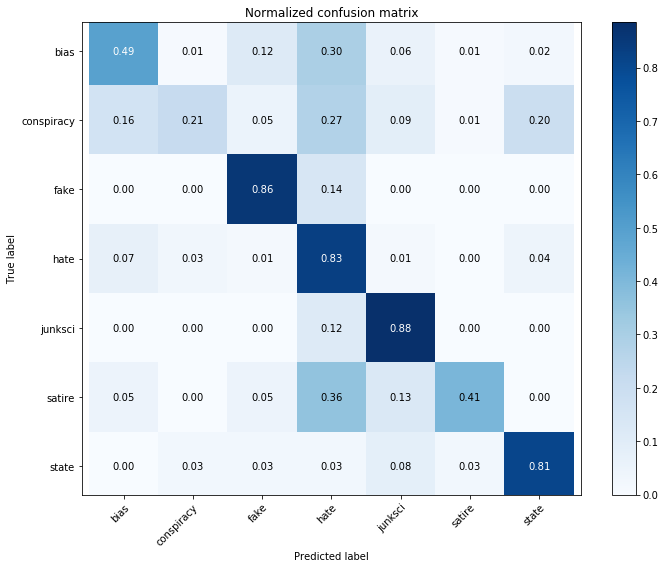

In [101]:
nb_pred = rs_nb.predict(test_tfIdf)
print(classification_report(ytest,nb_pred))

cnf_matrix = confusion_matrix(ytest,nb_pred)
mltcnf_matrix = multilabel_confusion_matrix(ytest,nb_pred)
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y), normalize=True,
                      title='Normalized confusion matrix')


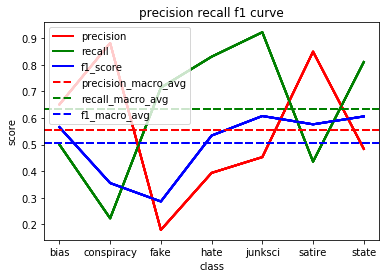

In [45]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, nb_pred)[0]
    recall[i]= precision_recall_fscore_support(ytest, nb_pred)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, nb_pred)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

In [193]:
print("Hamming Loss: ",hamming_loss(ytest,nb_pred))

Hamming Loss:  0.4900662251655629


In [29]:

#     ytrain = np.array(ytrain).flatten()
#     kf = StratifiedKFold(n_splits=5, random_state=8)
#     cross_val_f1_score_lst = []
#     cross_val_accuracy_lst = []
#     cross_val_recall_lst = []
#     cross_val_precision_lst = []

#     for train_index_ls, validation_index_ls in kf.split(train_tfIdf, ytrain):
#         # keeping validation set apart and oversampling in each iteration using smote 
#         train, validation = train_tfIdf[train_index_ls], train_tfIdf[validation_index_ls]
#         target_train, target_val = ytrain[train_index_ls], ytrain[validation_index_ls]
#         sm = SMOTE(random_state=8)
#         X_train_res, y_train_res = sm.fit_sample(train, target_train,)
        
#         # training the model on oversampled 4 folds of training set
       
#         nb_classifier.fit(X_train_res, y_train_res)
#         # testing on 1 fold of validation set
#         validation_preds = nb_classifier.predict(validation)   
#         cross_val_recall_lst.append(recall_score(target_val, validation_preds, average='macro'))
#         cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
#         cross_val_precision_lst.append(precision_score(target_val, validation_preds, average='macro'))
#         cross_val_f1_score_lst.append(f1_score(target_val, validation_preds, average='macro'))

#     print ('Average Recall score: {}'.format(np.mean(cross_val_recall_lst)))
#     print ('Average F1 scores: {}'.format(np.mean(cross_val_f1_score_lst)))
#     print ('Average Accuracy scores: {}'.format(np.mean(cross_val_accuracy_lst)))
#     print ('Average Precision scores: {}'.format(np.mean(cross_val_precision_lst)))


In [45]:
# sm = SMOTE(random_state=8)
# train_tfIdfup, ytrainup = sm.fit_sample(train_tfIdf, ytrain, )
# print ('Shape of oversampled data: {}'.format(train_tfIdfup.shape))
# print ('Shape of Y: {}'.format(ytrainup.shape))

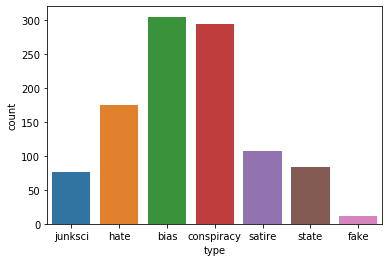

In [67]:
sns.countplot(ytrain)

In [102]:
Xtrain_RF = train_tfIdf
ytrain_RF = ytrain

In [103]:
rf_model = Pipeline([
        ('upsampling', SMOTE()),
        ('rfc_classification', RandomForestClassifier())
    ])

In [104]:
#rf_classifier = RandomForestClassifier()

# Number of trees in random forest
n_estimators = np.linspace(70, 115, 46).astype(int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.linspace(100, 200, 101).astype(int)
# Minimum number of samples required to split a node
min_samples_split = np.linspace(10, 50, 41).astype(int)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.linspace(10, 50, 41).astype(int)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rfc_classification__n_estimators': n_estimators,
               'rfc_classification__max_features': max_features,
               'rfc_classification__max_depth': max_depth,
               'rfc_classification__min_samples_split': min_samples_split,
               'rfc_classification__min_samples_leaf': min_samples_leaf,
               'rfc_classification__bootstrap': bootstrap}
print(random_grid)


{'rfc_classification__n_estimators': array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115]), 'rfc_classification__max_features': ['auto', 'sqrt'], 'rfc_classification__max_depth': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200]), 'rfc_classification__min_samples_split': array([10, 1

In [105]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [106]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']
    rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 5, random_state=42,iid = True, scoring=scoring, refit='recall_macro')
    # Fit the random search model
    rf_random.fit(Xtrain_RF, ytrain_RF)

In [199]:
rf_random.best_params_

{'rfc_classification__n_estimators': 111,
 'rfc_classification__min_samples_split': 10,
 'rfc_classification__min_samples_leaf': 11,
 'rfc_classification__max_features': 'auto',
 'rfc_classification__max_depth': 138,
 'rfc_classification__bootstrap': False}

In [200]:
RF_CVResults  = pd.DataFrame(rf_random.cv_results_)

print('Accuracy: ',np.mean(RF_CVResults.mean_test_accuracy))
print('Precision: ',np.mean(RF_CVResults.mean_test_precision_macro))
print('Recall: ',np.mean(RF_CVResults.mean_test_recall_macro))
print('F1-Score: ',np.mean(RF_CVResults.mean_test_f1_macro))


Accuracy:  0.6561385199240989
Precision:  0.6654007885383325
Recall:  0.6788220399740055
F1-Score:  0.6618690156188995


In [87]:
rf_pred = rf_random.predict(test_tfIdf)
print(classification_report(ytest,rf_pred))

cnf_matrix = confusion_matrix(ytest,rf_pred)
mltcnf_matrix = multilabel_confusion_matrix(ytest,rf_pred)
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=np.unique(y), normalize=True,
                      title='Normalized confusion matrix')

NameError: name 'rf_random' is not defined

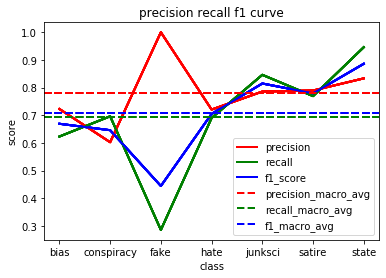

In [54]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, rf_pred)[0]
    recall[i]= precision_recall_fscore_support(ytest, rf_pred)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, rf_pred)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

In [202]:
print("Hamming Loss: ",hamming_loss(ytest,rf_pred))

Hamming Loss:  0.293598233995585


In [68]:
Xtrain_svm = train_tfIdf
ytrain_svm = ytrain

In [69]:
svm_model = Pipeline([
        ('upsampling', SMOTE()),
        ('svm_classification', SVC())
    ])

In [73]:
gamma = np.linspace(1e-5, 10000, 10)
r_range = np.linspace(0.001,10000,10)
c_range = 1/r_range

scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']
    
tuned_parameters = {'svm_classification__kernel': ['rbf','sigmoid','linear','poly'], 'svm_classification__gamma': gamma, 'svm_classification__C': c_range}
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    svc_gscv = RandomizedSearchCV(svm_model, tuned_parameters, cv=5,scoring=scoring,refit='recall_macro')
    svc_gscv.fit(Xtrain_svm, ytrain_svm)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
svc_gscv.best_params_

{'svm_classification__kernel': 'rbf',
 'svm_classification__gamma': 1e-05,
 'svm_classification__C': 0.00022499997187500352}

In [87]:
ytrain_svm

841        junksci
1257          hate
828        junksci
881           bias
1242          hate
           ...    
763         satire
835        junksci
1216          hate
559           hate
684     conspiracy
Name: type, Length: 1054, dtype: object

              precision    recall  f1-score   support

        bias       0.62      0.66      0.64       138
  conspiracy       0.47      0.69      0.56       135
        fake       1.00      0.14      0.25         7
        hate       0.70      0.62      0.66        71
     junksci       0.83      0.38      0.53        26
      satire       0.93      0.33      0.49        39
       state       0.79      0.41      0.54        37

    accuracy                           0.59       453
   macro avg       0.76      0.46      0.52       453
weighted avg       0.65      0.59      0.58       453

[[[260  55]
  [ 47  91]]

 [[213 105]
  [ 42  93]]

 [[446   0]
  [  6   1]]

 [[363  19]
  [ 27  44]]

 [[425   2]
  [ 16  10]]

 [[413   1]
  [ 26  13]]

 [[412   4]
  [ 22  15]]]
Normalized confusion matrix


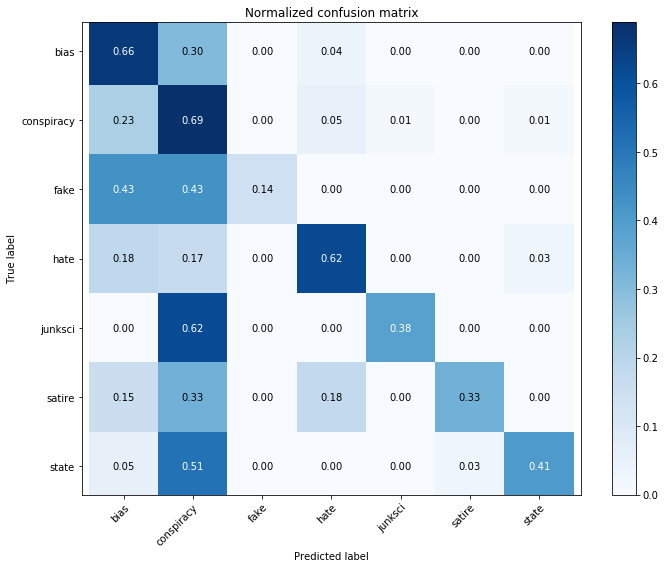

In [81]:
ypred_svc = svc_gscv.predict(test_tfIdf)
cnf_matrix = confusion_matrix(ytest,ypred_svc)
mltcnf_matrix = multilabel_confusion_matrix(ytest,ypred_svc)
print(classification_report(ytest,ypred_svc))
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, np.unique(ytrain_svm), normalize=True,
                      title='Normalized confusion matrix')

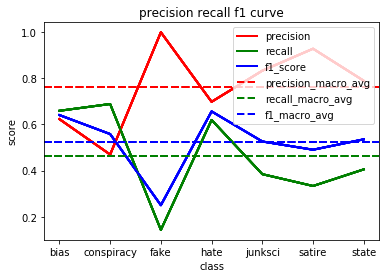

In [76]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, ypred_svc)[0]
    recall[i]= precision_recall_fscore_support(ytest, ypred_svc)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, ypred_svc)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

Xgboost

In [25]:
ytrain

841        junksci
1257          hate
828        junksci
881           bias
1242          hate
           ...    
763         satire
835        junksci
1216          hate
559           hate
684     conspiracy
Name: type, Length: 1054, dtype: object

In [29]:
y = fakeNews.type
X = fakeNews.drop('type', axis = 'columns')
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, label_encoded_y, test_size = 0.3, random_state = 0)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(1054, 2) (1054,) (453, 2) (453,)


In [30]:
stemmer = SnowballStemmer("english")
words = stopwords.words("english")

Xtrain.loc[:, 'title'] = Xtrain['title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
Xtrain.loc[:, 'text'] = Xtrain['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
Xtest.loc[:, 'text'] = Xtest['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [31]:
Xtrain = Xtrain['text']
Xtest = Xtest['text']

In [32]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(Xtrain.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(Xtest.values.astype('U'))

In [33]:
dtrain = xgb.DMatrix(train_tfIdf, label=ytrain)

In [34]:
def bo_tune_xgb(max_depth, gamma, n_estimators, learning_rate):
     params = {'max_depth': int(max_depth),
               'gamma': gamma,
               'n_estimators': int(n_estimators),
               'learning_rate': learning_rate,
               'eval_metric': 'rmse'}

     #Cross validating with the specified parameters in 5 folds and 70 iterations
     cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
     #Return the negative RMSE
     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [35]:

xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 7), 
                                            'gamma': (0, 1),
                                            'n_estimators': (100,200),
                                            'learning_rate': (0,1)
                                             })
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -1.223    |  0.2093   |  0.6944   |  3.042    |  142.1    |
|  2        | -1.06     |  0.1158   |  0.1961   |  5.856    |  188.2    |
|  3        | -1.08     |  0.203    |  0.2281   |  4.475    |  118.5    |
|  4        | -2.558    |  1.0      |  0.0      |  7.0      |  100.0    |
|  5        | -1.069    |  0.09682  |  0.2091   |  5.953    |  188.2    |
|  6        | -2.558    |  1.0      |  0.0      |  3.0      |  177.9    |
|  7        | -2.558    |  1.0      |  0.0      |  3.0      |  192.8    |
|  8        | -2.558    |  0.0      |  0.0      |  4.969    |  185.7    |


In [36]:
#xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

In [37]:
params = xgb_bo.max['params']
print(params)

{'gamma': 0.11577614583869267, 'learning_rate': 0.19608380176638496, 'max_depth': 5.855811094634812, 'n_estimators': 188.15494873863673}


In [38]:
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [39]:
xgb_model = Pipeline([
        ('upsampling', SMOTE()),
        ('xgb_classification', XGBClassifier(objective = 'multi:softmax',**params))
    ])
xgb_classifier = xgb_model.fit(train_tfIdf, ytrain)



In [44]:
np.unique(y)

array(['bias', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state'],
      dtype=object)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       138
           1       0.76      0.81      0.78       135
           2       1.00      0.71      0.83         7
           3       0.83      0.75      0.79        71
           4       0.89      0.96      0.93        26
           5       0.92      0.92      0.92        39
           6       0.88      0.95      0.91        37

    accuracy                           0.82       453
   macro avg       0.87      0.84      0.85       453
weighted avg       0.82      0.82      0.82       453

[[[289  26]
  [ 31 107]]

 [[283  35]
  [ 26 109]]

 [[446   0]
  [  2   5]]

 [[371  11]
  [ 18  53]]

 [[424   3]
  [  1  25]]

 [[411   3]
  [  3  36]]

 [[411   5]
  [  2  35]]]
Normalized confusion matrix


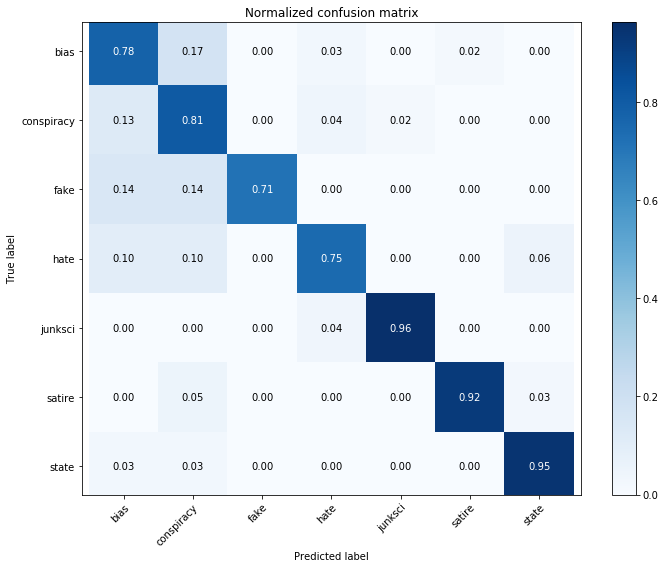

In [80]:
ypred_xgb = xgb_classifier.predict(test_tfIdf)
cnf_matrix = confusion_matrix(ytest,ypred_xgb)
mltcnf_matrix = multilabel_confusion_matrix(ytest,ypred_xgb)
print(classification_report(ytest,ypred_xgb))
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, np.unique(y), normalize=True,
                      title='Normalized confusion matrix')

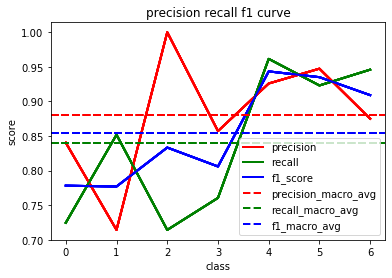

In [166]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, ypred_xgb)[0]
    recall[i]= precision_recall_fscore_support(ytest, ypred_xgb)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, ypred_xgb)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

In [182]:
print("Hamming Loss: ",hamming_loss(ytest,ypred_xgb))

Hamming Loss:  0.18322295805739514


In [82]:
cnf_matrix = cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1)

In [83]:
TruePositive = np.diag(cnf_matrix)
print(TruePositive)
print(np.mean(TruePositive))

[0.77536232 0.80740741 0.71428571 0.74647887 0.96153846 0.92307692
 0.94594595]
0.8391565206192098


In [84]:
FalsePositive = []
for i in range(7):
    FalsePositive.append(sum(cnf_matrix[:,i]) - cnf_matrix[i,i])
print(FalsePositive)
print(np.mean(FalsePositive))

[0.18840579710144933, 0.2592592592592592, 0.0, 0.15492957746478875, 0.11538461538461531, 0.07692307692307687, 0.1351351351351352]
0.1328624944669035


In [85]:
FalseNegative = []
for i in range(7):
    FalseNegative.append(sum(cnf_matrix[i,:]) - cnf_matrix[i,i])
print(FalseNegative)
print(np.mean(FalseNegative))

[0.3110388828698688, 0.3230800634352379, 0.014653784219001653, 0.21068459764111935, 0.014084507042253502, 0.04184184184184181, 0.014653784219001653]
0.1328624944669035


In [86]:
TrueNegative = []
for i in range(7):
    temp = np.delete(cnf_matrix, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TrueNegative.append(sum(sum(temp)))
print(TrueNegative)
#print(np.mean(TrueNegative))

[5.529326106790895, 5.414386375500889, 6.075193607098077, 5.692040057257448, 5.713125521637464, 5.762291263760952, 5.708398240302711]


In [52]:
l = len(ytest)
for i in range(7):
    print(TruePositive[i] + FalsePositive[i] + FalseNegative[i] + TrueNegative[i] == l)

True
True
True
True
True
True
True


Multiclass AdaBoosted DecisionTrees

In [ ]:
Xtrain_ab = train_tfIdf
ytrain_ab = ytrain

In [59]:
adaboost_model = Pipeline([
        ('upsampling', SMOTE()),
        ('adaboost_classification', AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    algorithm="SAMME"))
    ])

In [60]:
adaboost_model.fit(train_tfIdf, ytrain)

Pipeline(memory=None,
         steps=[('upsampling',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('adaboost_classification',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=None))],
         verbose=False)

In [61]:
ypred_adaboost = adaboost_model.predict(test_tfIdf)

In [62]:
print(classification_report(ytest,ypred_adaboost))

              precision    recall  f1-score   support

        bias       0.50      0.07      0.13       138
  conspiracy       0.62      0.12      0.20       135
        fake       1.00      0.71      0.83         7
        hate       0.19      0.08      0.12        71
     junksci       1.00      0.92      0.96        26
      satire       0.11      0.92      0.19        39
       state       1.00      0.38      0.55        37

    accuracy                           0.25       453
   macro avg       0.63      0.46      0.43       453
weighted avg       0.53      0.25      0.25       453



Gradient Boosting

In [ ]:
Xtrain_gb = train_tfIdf
ytrain_gb = ytrain

In [65]:
gradboost_model = Pipeline([
        ('upsampling', SMOTE()),
        ('gradboost_classification', GradientBoostingClassifier())
    ])

In [ ]:
n_estimators = np.linspace(10, 1000, 100).astype(int)
# Maximum number of levels
max_depth = np.linspace(1, 100, 100).astype(int)

# Create the random grid
gb_random_grid = {'gradboost_classification__n_estimators': n_estimators,
               'gradboost_classification__max_depth': max_depth}
print(gb_random_grid)

In [66]:
#gradboost_model.fit(Xtrain_gb, ytrain_gb)

Pipeline(memory=None,
         steps=[('upsampling',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('gradboost_classification',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_frac

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    scoring = ['accuracy', 'recall_macro', 'precision_macro', 'f1_macro']
    gb_random = RandomizedSearchCV(estimator = gradboost_model, param_distributions = gb_random_grid, n_iter = 100, cv = 5, random_state=42,iid = True, scoring=scoring, refit='recall_macro')
    # Fit the random search model
    gb_random.fit(Xtrain_gb, ytrain_gb)

In [ ]:
gb_random.best_params_

In [ ]:
gb_CVResults  = pd.DataFrame(gb_random.cv_results_)

In [67]:
ypred_gradboost = gradboost_model.predict(test_tfIdf)
print(classification_report(ytest,ypred_gradboost))
cnf_matrix = confusion_matrix(ytest,ypred_gradboost)
mltcnf_matrix = multilabel_confusion_matrix(ytest,ypred_gradboost)
print(mltcnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=np.unique(ytrain_gb), normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
precision = dict()
recall = dict()
f1_score = dict()
for i in np.unique(ytest):
    precision[i]= precision_recall_fscore_support(ytest, ypred_gradboost)[0]
    recall[i]= precision_recall_fscore_support(ytest, ypred_gradboost)[1]
    f1_score[i]= precision_recall_fscore_support(ytest, ypred_gradboost)[2]
    plt.plot(np.unique(ytest) , precision[i],lw=2, color='red')
    plt.plot(np.unique(ytest),recall[i],lw=2, color='green')
    plt.plot(np.unique(ytest) , f1_score[i],lw=2, color='blue')
    plt.axhline(np.mean(precision[i]),lw=2, color='red', ls='--')
    plt.axhline(np.mean(recall[i]),lw=2, color='green', ls='--')
    plt.axhline(np.mean(f1_score[i]),lw=2, color='blue', ls='--')
plt.xlabel("class")
plt.ylabel("score")
plt.legend(loc="best", labels=['precision','recall','f1_score','precision_macro_avg','recall_macro_avg','f1_macro_avg'])
plt.title("precision recall f1 curve")
plt.show()

In [68]:
print(classification_report(ytest,ypred_gradboost))

              precision    recall  f1-score   support

        bias       0.83      0.69      0.75       138
  conspiracy       0.67      0.89      0.77       135
        fake       1.00      0.71      0.83         7
        hate       0.88      0.69      0.77        71
     junksci       1.00      0.92      0.96        26
      satire       0.84      0.82      0.83        39
       state       0.89      0.89      0.89        37

    accuracy                           0.79       453
   macro avg       0.87      0.80      0.83       453
weighted avg       0.81      0.79      0.79       453



array([0, 1, 2, 3, 4, 5, 6])